In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('../datasets/wine/wine.data')

In [5]:
df.isna().sum()

1        0
14.23    0
1.71     0
2.43     0
15.6     0
127      0
2.8      0
3.06     0
.28      0
2.29     0
5.64     0
1.04     0
3.92     0
1065     0
dtype: int64

In [6]:
df.describe()


,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.dtypes

1          int64
14.23    float64
1.71     float64
2.43     float64
15.6     float64
127        int64
2.8      float64
3.06     float64
.28      float64
2.29     float64
5.64     float64
1.04     float64
3.92     float64
1065       int64
dtype: object

In [8]:
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [13]:
X = df.iloc[:,1:]

In [14]:
y = df.iloc[:, 0]

In [15]:
X

,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [16]:
y

0      1
1      1
2      1
3      1
4      1
      ..
172    3
173    3
174    3
175    3
176    3
Name: 1, Length: 177, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [20]:
knn_model = KNeighborsClassifier(n_neighbors=8) 

In [21]:
knn_model.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",8
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [22]:
y_pred = knn_model.predict(X_test)

In [24]:
knn_model.score(X_test, y_test)

0.9166666666666666

In [25]:
cm = confusion_matrix(y_pred, y_test)

In [26]:
cm

array([[14,  2,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]])

In [27]:
cr = classification_report(y_pred, y_test)

In [29]:
print(cr)

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.77      1.00      0.87        10
           3       1.00      0.90      0.95        10

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.94      0.92      0.92        36



In [32]:
from sklearn.metrics import accuracy_score

k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

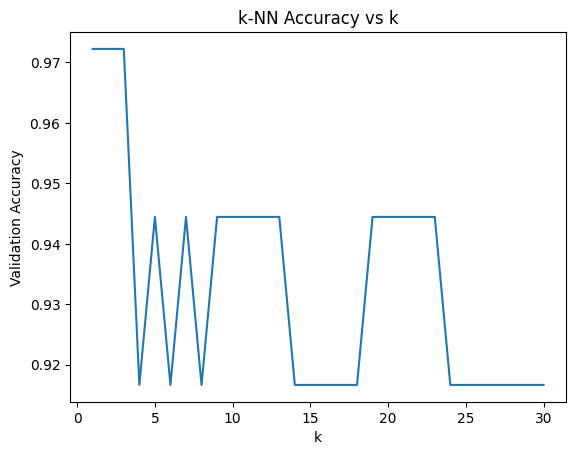

In [34]:
import matplotlib.pyplot as plt

plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("k-NN Accuracy vs k")
plt.show()


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

max_depths = range(1,21)
f1_scores = []

for i in max_depths:
    tree = DecisionTreeClassifier(
        max_depth=max_depths[i-1],
    )
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    f1_scores.append(f1_score(y_test, pred, average="macro"))



In [56]:
f1_scores

[0.49382716049382713,
 0.820392156862745,
 0.845997815571852,
 0.8144423158790975,
 0.7438423645320197,
 0.7438423645320197,
 0.7438423645320197,
 0.8144423158790975,
 0.8144423158790975,
 0.8144423158790975,
 0.845997815571852,
 0.8144423158790975,
 0.7438423645320197,
 0.8144423158790975,
 0.7438423645320197,
 0.845997815571852,
 0.8144423158790975,
 0.7438423645320197,
 0.845997815571852,
 0.7438423645320197]

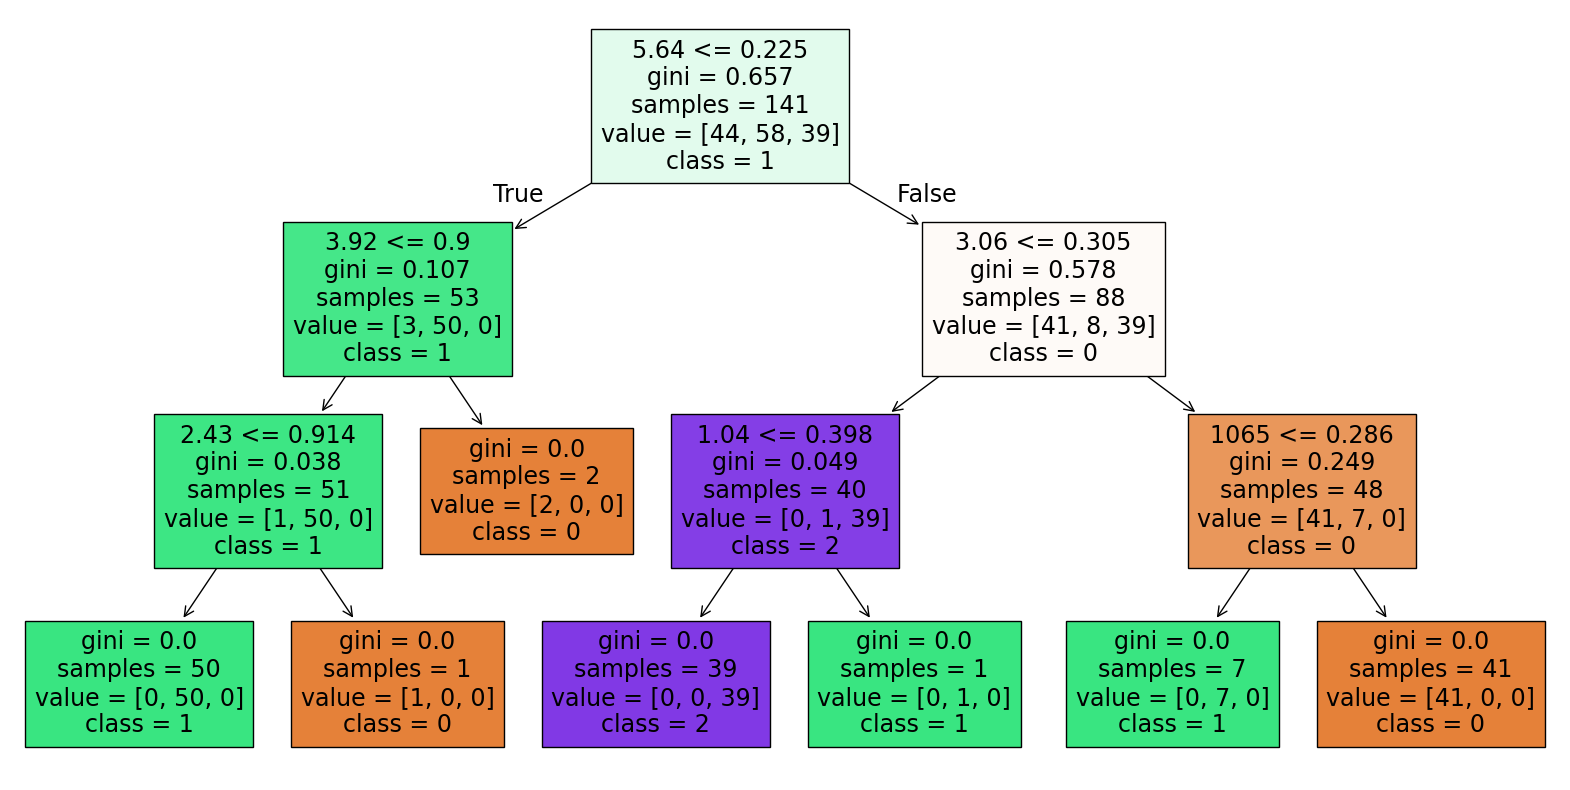

In [59]:
from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(
        max_depth=max_depths[f1_scores.index(max(f1_scores))],
    )
tree.fit(X_train, y_train)

feature_names = ["14.23","1.71","2.43","15.6"	,"127"	,"2.8"	,"3.06"	,".28"	,"2.29"	,"5.64"	,"1.04" ,"3.92"	,"1065"]
plt.figure(figsize=(20, 10))
plot_tree(
    tree,
    feature_names=feature_names,
    class_names=["0","1","2"],
    filled=True
)
plt.show()


In [60]:

# k-NN best model
best_k = k_values[accuracies.index(max(accuracies))]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)



knn_preds = knn_best.predict(X_test)
tree_preds = tree.predict(X_test)

print("k-NN Accuracy:", accuracy_score(y_test, knn_preds))
print("k-NN F1:", f1_score(y_test, knn_preds, average="macro"))

print("Tree Accuracy:", accuracy_score(y_test, tree_preds))
print("Tree F1:", f1_score(y_test, tree_preds, average="macro"))


k-NN Accuracy: 0.9722222222222222
k-NN F1: 0.9691228070175438
Tree Accuracy: 0.8333333333333334
Tree F1: 0.845997815571852
